Implementation of LSTM Model on AUD_USD(H1) prediction of the close price 1 hour ahead based on data of previous 24 hours

## 1. Data Preparation

### 1.1 Read in data file

In [1]:
## Mount google drive
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import talib as ta

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

# from utils import series_to_supervised

## 2. Data Processing

In [3]:
data = pd.read_csv('AUD_USD_H1_withindicators.csv')

In [4]:
data

,open,high,low,close,upperband,middleband,lowerband,dema,ema,ht,...,cdlspinningtop,cdlstalledpattern,cdlsticksandwich,cdltakuri,cdltasukigap,cdlthrusting,cdltristar,cdlunique3river,cdlupsidegap2crows,cdlxsidegap3methods
0,0.76660,0.76740,0.76620,0.76690,0.772125,0.767171,0.762217,0.765635,0.766812,0.766752,...,100,0,0,0,0,0,0,0,0,0
1,0.76700,0.76740,0.76680,0.76720,0.771836,0.767046,0.762255,0.765789,0.766843,0.766669,...,0,0,0,0,0,0,0,0,0,0
2,0.76720,0.76720,0.76630,0.76710,0.771420,0.766892,0.762363,0.765913,0.766864,0.766620,...,0,0,0,100,0,0,0,0,0,0
3,0.76720,0.76750,0.76620,0.76660,0.771182,0.766775,0.762368,0.765948,0.766843,0.766482,...,0,0,0,0,0,0,0,0,0,0
4,0.76660,0.76740,0.76630,0.76700,0.770581,0.766596,0.762610,0.766044,0.766855,0.766334,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102554,0.77218,0.77353,0.77122,0.77186,0.792204,0.781209,0.770214,0.773963,0.780610,0.786190,...,-100,0,0,0,0,0,0,0,0,0
102555,0.77190,0.77235,0.77064,0.77088,0.791442,0.780397,0.769351,0.773000,0.779832,0.785098,...,0,0,0,0,0,0,0,0,0,0
102556,0.77092,0.77152,0.76924,0.76947,0.791248,0.779687,0.768125,0.771955,0.779003,0.784054,...,0,0,0,0,0,0,0,0,0,0
102557,0.76944,0.77106,0.76926,0.77038,0.790680,0.778986,0.767292,0.771195,0.778313,0.783281,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_split_frac = 0.8
val_split_frac = 0.9

train_split = int(train_split_frac * int(data.shape[0]))  ## end of train index (exclusive)
val_split = int(val_split_frac * int(data.shape[0]))      ## end of val index (exclusive)

In [6]:
step = 1
past = 24
future = 1
learning_rate = 0.00001
batch_size = 256
epochs = 1000

y = data[['close']]

### 2.1 Train - validation - test split

In [7]:
training_data = data[: train_split]
validation_data = data[train_split: val_split]
test_data = data[val_split:]

In [8]:
print('Shape of training_data:   ', training_data.shape)
print('Shape of validation_data: ', validation_data.shape)
print('Shape of test_data:       ', test_data.shape)

Shape of training_data:    (82047, 139)
Shape of validation_data:  (10256, 139)
Shape of test_data:        (10256, 139)


### 2.2 Standardisation


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

In [10]:
training_data = scaler.fit_transform(training_data)
validation_data = scaler.transform(validation_data)
test_data = scaler.transform(test_data)

### 2.3 Training dataset

In [11]:
train_y_start = past + future
train_y_end = train_y_start + train_split

In [12]:
x_train = training_data
y_train = y.iloc[train_y_start: train_y_end].values

In [13]:
sequence_length = int(past / step)

In [14]:
import tensorflow as tf
from tensorflow import keras

dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 2.4 Validation dataset

In [15]:
val_y_start = train_y_end
val_y_end = train_y_start + val_split

In [16]:
x_val = validation_data
y_val = y.iloc[val_y_start: val_y_end].values

In [17]:
dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

### 2.5 Test dataset

In [18]:
x_end = len(test_data) - past - future

In [19]:
test_y_start = val_y_end

In [20]:
x_test = test_data[: x_end]
y_test = y.iloc[test_y_start: ].values

In [21]:
dataset_test = keras.preprocessing.timeseries_dataset_from_array(
    x_test,
    y_test,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=1,
)

### 2.4 Input and output shape

In [22]:
for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (256, 24, 139)
Target shape: (256, 1)


## 3. Experiment1: LSTM model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU
import keras

### 3.1 Training

In [24]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
gru_out = keras.layers.GRU(200)(inputs)
outputs = keras.layers.Dense(1)(gru_out)

model1 = keras.Model(inputs=inputs, outputs=outputs)
model1.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 24, 139)]         0         
_________________________________________________________________
gru (GRU)                    (None, 200)               204600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 204,801
Trainable params: 204,801
Non-trainable params: 0
_________________________________________________________________


In [25]:
path_checkpoint1 = "model_checkpoint_gru.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=30)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint1,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model1.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/1000
321/321 [==============================] - 32s 95ms/step - loss: 0.0517 - val_loss: 0.0047

Epoch 00001: val_loss improved from inf to 0.00471, saving model to model_checkpoint_gru.h5
Epoch 2/1000
321/321 [==============================] - 29s 90ms/step - loss: 0.0041 - val_loss: 0.0017

Epoch 00002: val_loss improved from 0.00471 to 0.00173, saving model to model_checkpoint_gru.h5
Epoch 3/1000
321/321 [==============================] - 29s 89ms/step - loss: 0.0019 - val_loss: 0.0012

Epoch 00003: val_loss improved from 0.00173 to 0.00119, saving model to model_checkpoint_gru.h5
Epoch 4/1000
321/321 [==============================] - 29s 89ms/step - loss: 0.0014 - val_loss: 0.0011

Epoch 00004: val_loss improved from 0.00119 to 0.00108, saving model to model_checkpoint_gru.h5
Epoch 5/1000
321/321 [==============================] - 29s 90ms/step - loss: 0.0011 - val_loss: 0.0011

Epoch 00005: val_loss did not improve from 0.00108
Epoch 6/1000
321/321 [======================

321/321 [==============================] - 29s 90ms/step - loss: 1.5146e-04 - val_loss: 5.4196e-05

Epoch 00045: val_loss improved from 0.00006 to 0.00005, saving model to model_checkpoint_gru.h5
Epoch 46/1000
321/321 [==============================] - 29s 90ms/step - loss: 1.4931e-04 - val_loss: 5.1005e-05

Epoch 00046: val_loss improved from 0.00005 to 0.00005, saving model to model_checkpoint_gru.h5
Epoch 47/1000
321/321 [==============================] - 29s 89ms/step - loss: 1.4725e-04 - val_loss: 4.8032e-05

Epoch 00047: val_loss improved from 0.00005 to 0.00005, saving model to model_checkpoint_gru.h5
Epoch 48/1000
321/321 [==============================] - 29s 89ms/step - loss: 1.4526e-04 - val_loss: 4.5267e-05

Epoch 00048: val_loss improved from 0.00005 to 0.00005, saving model to model_checkpoint_gru.h5
Epoch 49/1000
321/321 [==============================] - 29s 89ms/step - loss: 1.4333e-04 - val_loss: 4.2747e-05

Epoch 00049: val_loss improved from 0.00005 to 0.00004, savi

321/321 [==============================] - 28s 88ms/step - loss: 7.8805e-05 - val_loss: 1.2419e-05

Epoch 00123: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 124/1000
321/321 [==============================] - 28s 87ms/step - loss: 7.8514e-05 - val_loss: 1.2318e-05

Epoch 00124: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 125/1000
321/321 [==============================] - 29s 90ms/step - loss: 7.8226e-05 - val_loss: 1.2219e-05

Epoch 00125: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 126/1000
321/321 [==============================] - 30s 95ms/step - loss: 7.7941e-05 - val_loss: 1.2123e-05

Epoch 00126: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 127/1000
321/321 [==============================] - 29s 89ms/step - loss: 7.7658e-05 - val_loss: 1.2027e-05

Epoch 00127: val_loss improved from 0.00001 to 0.00001, 

321/321 [==============================] - 28s 89ms/step - loss: 6.9523e-05 - val_loss: 9.5158e-06

Epoch 00162: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 163/1000
321/321 [==============================] - 29s 89ms/step - loss: 6.9329e-05 - val_loss: 9.4617e-06

Epoch 00163: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 164/1000
321/321 [==============================] - 29s 89ms/step - loss: 6.9136e-05 - val_loss: 9.4082e-06

Epoch 00164: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 165/1000
321/321 [==============================] - 29s 90ms/step - loss: 6.8944e-05 - val_loss: 9.3556e-06

Epoch 00165: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 166/1000
321/321 [==============================] - 29s 90ms/step - loss: 6.8754e-05 - val_loss: 9.3035e-06

Epoch 00166: val_loss improved from 0.00001 to 0.00001, 

321/321 [==============================] - 29s 91ms/step - loss: 6.2792e-05 - val_loss: 7.8399e-06

Epoch 00201: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 202/1000
321/321 [==============================] - 29s 91ms/step - loss: 6.2638e-05 - val_loss: 7.8062e-06

Epoch 00202: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 203/1000
321/321 [==============================] - 29s 91ms/step - loss: 6.2486e-05 - val_loss: 7.7728e-06

Epoch 00203: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 204/1000
321/321 [==============================] - 29s 91ms/step - loss: 6.2334e-05 - val_loss: 7.7399e-06

Epoch 00204: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 205/1000
321/321 [==============================] - 29s 91ms/step - loss: 6.2183e-05 - val_loss: 7.7073e-06

Epoch 00205: val_loss improved from 0.00001 to 0.00001, 

321/321 [==============================] - 28s 88ms/step - loss: 5.7393e-05 - val_loss: 6.7424e-06

Epoch 00240: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 241/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.7267e-05 - val_loss: 6.7192e-06

Epoch 00241: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 242/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.7141e-05 - val_loss: 6.6962e-06

Epoch 00242: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 243/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.7016e-05 - val_loss: 6.6735e-06

Epoch 00243: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 244/1000
321/321 [==============================] - 29s 89ms/step - loss: 5.6891e-05 - val_loss: 6.6509e-06

Epoch 00244: val_loss improved from 0.00001 to 0.00001, 

321/321 [==============================] - 28s 88ms/step - loss: 5.2835e-05 - val_loss: 5.9689e-06

Epoch 00279: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 280/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.2730e-05 - val_loss: 5.9520e-06

Epoch 00280: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 281/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.2626e-05 - val_loss: 5.9354e-06

Epoch 00281: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 282/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.2523e-05 - val_loss: 5.9187e-06

Epoch 00282: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 283/1000
321/321 [==============================] - 28s 88ms/step - loss: 5.2421e-05 - val_loss: 5.9021e-06

Epoch 00283: val_loss improved from 0.00001 to 0.00001, 

321/321 [==============================] - 28s 88ms/step - loss: 4.9114e-05 - val_loss: 5.3844e-06

Epoch 00318: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 319/1000
321/321 [==============================] - 29s 89ms/step - loss: 4.9032e-05 - val_loss: 5.3711e-06

Epoch 00319: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 320/1000
321/321 [==============================] - 28s 88ms/step - loss: 4.8950e-05 - val_loss: 5.3579e-06

Epoch 00320: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 321/1000
321/321 [==============================] - 28s 89ms/step - loss: 4.8866e-05 - val_loss: 5.3448e-06

Epoch 00321: val_loss improved from 0.00001 to 0.00001, saving model to model_checkpoint_gru.h5
Epoch 322/1000
321/321 [==============================] - 28s 89ms/step - loss: 4.8781e-05 - val_loss: 5.3319e-06

Epoch 00322: val_loss improved from 0.00001 to 0.00001, 

321/321 [==============================] - 28s 89ms/step - loss: 4.5934e-05 - val_loss: 4.9552e-06

Epoch 00357: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 358/1000
321/321 [==============================] - 28s 88ms/step - loss: 4.5840e-05 - val_loss: 4.9470e-06

Epoch 00358: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 359/1000
321/321 [==============================] - 28s 88ms/step - loss: 4.5748e-05 - val_loss: 4.9390e-06

Epoch 00359: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 360/1000
321/321 [==============================] - 29s 89ms/step - loss: 4.5657e-05 - val_loss: 4.9311e-06

Epoch 00360: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 361/1000
321/321 [==============================] - 28s 89ms/step - loss: 4.5570e-05 - val_loss: 4.9233e-06

Epoch 00361: val_loss improved from 0.00000 to 0.00000, 

321/321 [==============================] - 28s 88ms/step - loss: 4.3140e-05 - val_loss: 4.6679e-06

Epoch 00396: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 397/1000
321/321 [==============================] - 28s 89ms/step - loss: 4.3140e-05 - val_loss: 4.6602e-06

Epoch 00397: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 398/1000
321/321 [==============================] - 28s 89ms/step - loss: 4.3148e-05 - val_loss: 4.6518e-06

Epoch 00398: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 399/1000
321/321 [==============================] - 29s 89ms/step - loss: 4.3162e-05 - val_loss: 4.6431e-06

Epoch 00399: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 400/1000
321/321 [==============================] - 29s 89ms/step - loss: 4.3178e-05 - val_loss: 4.6337e-06

Epoch 00400: val_loss improved from 0.00000 to 0.00000, 

321/321 [==============================] - 29s 91ms/step - loss: 4.2223e-05 - val_loss: 4.3802e-06

Epoch 00435: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 436/1000
321/321 [==============================] - 29s 91ms/step - loss: 4.2096e-05 - val_loss: 4.3710e-06

Epoch 00436: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 437/1000
321/321 [==============================] - 29s 91ms/step - loss: 4.1901e-05 - val_loss: 4.3634e-06

Epoch 00437: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 438/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.1639e-05 - val_loss: 4.3573e-06

Epoch 00438: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 439/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.1313e-05 - val_loss: 4.3529e-06

Epoch 00439: val_loss improved from 0.00000 to 0.00000, 

321/321 [==============================] - 29s 90ms/step - loss: 4.7504e-05 - val_loss: 3.9444e-06

Epoch 00527: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 528/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.8248e-05 - val_loss: 3.9200e-06

Epoch 00528: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 529/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.8485e-05 - val_loss: 3.9433e-06

Epoch 00529: val_loss did not improve from 0.00000
Epoch 530/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.8404e-05 - val_loss: 4.0130e-06

Epoch 00530: val_loss did not improve from 0.00000
Epoch 531/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.8095e-05 - val_loss: 4.0982e-06

Epoch 00531: val_loss did not improve from 0.00000
Epoch 532/1000
321/321 [==============================] - 29s 90ms/step - loss: 4.7526e-05 - va

321/321 [==============================] - 29s 90ms/step - loss: 3.7786e-05 - val_loss: 3.7436e-06

Epoch 00575: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 576/1000
321/321 [==============================] - 29s 89ms/step - loss: 3.5158e-05 - val_loss: 3.7194e-06

Epoch 00576: val_loss improved from 0.00000 to 0.00000, saving model to model_checkpoint_gru.h5
Epoch 577/1000
321/321 [==============================] - 29s 90ms/step - loss: 3.2433e-05 - val_loss: 3.7414e-06

Epoch 00577: val_loss did not improve from 0.00000
Epoch 578/1000
321/321 [==============================] - 29s 89ms/step - loss: 2.9759e-05 - val_loss: 3.8019e-06

Epoch 00578: val_loss did not improve from 0.00000
Epoch 579/1000
321/321 [==============================] - 29s 90ms/step - loss: 2.7361e-05 - val_loss: 3.8760e-06

Epoch 00579: val_loss did not improve from 0.00000
Epoch 580/1000
321/321 [==============================] - 29s 91ms/step - loss: 2.5495e-05 - va

321/321 [==============================] - 30s 93ms/step - loss: 2.0945e-05 - val_loss: 4.2367e-06

Epoch 00623: val_loss did not improve from 0.00000
Epoch 624/1000
321/321 [==============================] - 30s 94ms/step - loss: 2.0829e-05 - val_loss: 4.1598e-06

Epoch 00624: val_loss did not improve from 0.00000
Epoch 625/1000
321/321 [==============================] - 30s 93ms/step - loss: 2.1010e-05 - val_loss: 4.0516e-06

Epoch 00625: val_loss did not improve from 0.00000
Epoch 626/1000
321/321 [==============================] - 30s 94ms/step - loss: 2.1514e-05 - val_loss: 3.9559e-06

Epoch 00626: val_loss did not improve from 0.00000
Epoch 627/1000
321/321 [==============================] - 30s 94ms/step - loss: 2.2295e-05 - val_loss: 3.9060e-06

Epoch 00627: val_loss did not improve from 0.00000
Epoch 628/1000
321/321 [==============================] - 30s 94ms/step - loss: 2.3214e-05 - val_loss: 3.9161e-06

Epoch 00628: val_loss did not improve from 0.00000
Epoch 629/1000
321/

### 3.2 Train and validation losses

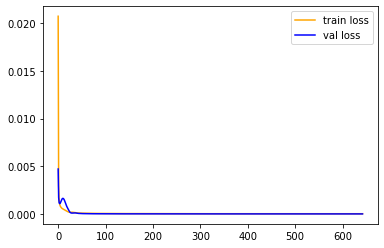

In [26]:
train_loss_1 = history.history['loss']
val_loss_1 = history.history['val_loss']
plt.plot(train_loss_1, label='train loss', c='orange')
plt.plot(val_loss_1, label='val loss', c='blue')
plt.legend(loc='best')
plt.show()

### 3.3 Prediction on test dataset

In [27]:
test_prediction_1 = []
test_actual = []
for x, y in dataset_test:
    test_actual.append(y[0][0])
    predict_res = model1.predict(x)[0][0]
    test_prediction_1.append(predict_res)
test_prediction_1 = np.array(test_prediction_1)
test_actual = np.array(test_actual)


### 3.4 Evaluation

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

rmse1 = mean_squared_error(test_actual, test_prediction_1, squared=False)
mape1 = mean_absolute_percentage_error(test_actual, test_prediction_1)
mae1 = mean_absolute_error(test_actual, test_prediction_1)

print('result evaluation')
print('RMSE: ', rmse1)
print('MAPE: ', mape1)
print('MAE:  ', mae1)

result evaluation
RMSE:  0.01848193721655263
MAPE:  0.020912596696768374
MAE:   0.014663887806687982


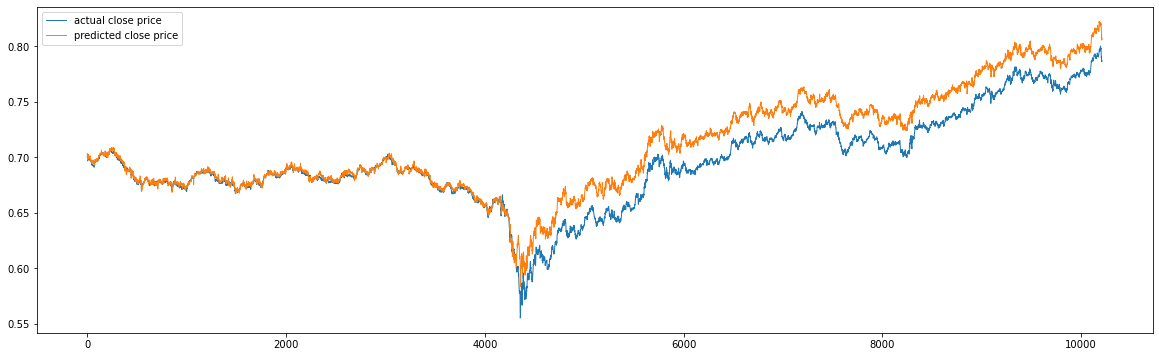

In [29]:
x_axis = [x for x in range(test_actual.shape[0])]
plt.figure(figsize=(20,6))

sns.lineplot(x=x_axis, y=test_actual, label='actual close price', linewidth=1)
sns.lineplot(x=x_axis, y=test_prediction_1, label='predicted close price', linewidth=1)
plt.legend()
plt.show()